## Студентка: Елисеева Елизавета ИУ5-23М
## Вариант 5


### Задача №5.
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".
### Задача №25.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

### Дополнительные требования по группам:
Для студентов групп ИУ5-23М, ИУ5И-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


from sklearn.preprocessing import OneHotEncoder


import sklearn

In [86]:
data = pd.read_csv("weatherHistory.csv")
%matplotlib inline

In [87]:
data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [88]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Formatted Date', ('object', 0)),
 ('Summary', ('object', 0)),
 ('Precip Type', ('object', 517)),
 ('Temperature (C)', ('float64', 0)),
 ('Apparent Temperature (C)', ('float64', 0)),
 ('Humidity', ('float64', 0)),
 ('Wind Speed (km/h)', ('float64', 0)),
 ('Wind Bearing (degrees)', ('float64', 0)),
 ('Visibility (km)', ('float64', 0)),
 ('Loud Cover', ('float64', 0)),
 ('Pressure (millibars)', ('float64', 0)),
 ('Daily Summary', ('object', 0))]

## one-hot encoding

In [89]:
# Один из способов закодировать категориальный признак
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['Summary']])
cat_enc_ohe

<96453x27 sparse matrix of type '<class 'numpy.float64'>'
	with 96453 stored elements in Compressed Sparse Row format>

In [90]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0

In [91]:
# Но лучше используем метод get_dummies, так как он возвращает dataframe объект и его легче добавить к нашему датасету.
Summary_hot_encoder = pd.get_dummies(data[['Summary']])
Summary_hot_encoder

,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
96449,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
96450,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
96451,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [92]:
# Произвели успешное добавление новых столбцов к датасету
data_new = data.join(Summary_hot_encoder)
# Можно удалить Summary, но оставим его для показа результата
# del data_new['Summary']
data_new

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,...,0,0,1,0,0,0,0,0,0,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,...,1,0,0,0,0,0,0,0,0,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,...,0,0,1,0,0,0,0,0,0,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,...,0,0,1,0,0,0,0,0,0,0
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,...,0,0,1,0,0,0,0,0,0,0
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,...,0,0,1,0,0,0,0,0,0,0
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,...,0,0,1,0,0,0,0,0,0,0


## Использование межквартильного размаха + boxplot

In [93]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

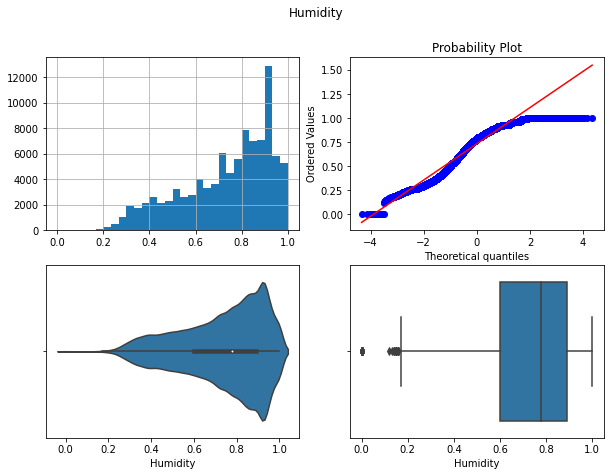

In [94]:
diagnostic_plots(data, 'Humidity', 'Humidity')

In [95]:
def get_outlier_boundaries(df, col):
    K = 1.5
    quant_75 = df[col].quantile(0.75)
    quant_25 = df[col].quantile(0.25)
    IQR = quant_75 - quant_25
    print('quantile 0.75: ', quant_75)
    print('quantile 0.25: ', quant_25)
    print('IQR: ', IQR)
    lower_boundary = quant_25 - (K * IQR)
    upper_boundary = quant_75 + (K * IQR)
    return lower_boundary, upper_boundary

get_outlier_boundaries(data, 'Humidity')

quantile 0.75:  0.89
quantile 0.25:  0.6
IQR:  0.29000000000000004


(0.16499999999999992, 1.3250000000000002)

quantile 0.75:  0.89
quantile 0.25:  0.6
IQR:  0.29000000000000004


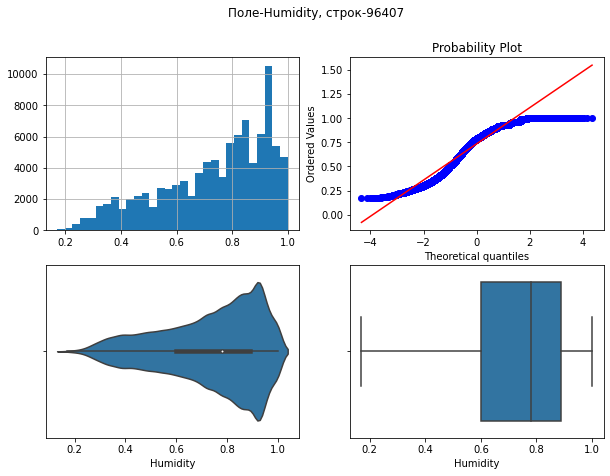

In [96]:
# Удаление выбросов для Humidity
_column = 'Humidity'

lower_boundary, upper_boundary = get_outlier_boundaries(data, _column)
outliers_temp = np.where(data[_column] > upper_boundary, True, 
                         np.where(data[_column] < lower_boundary, True, False))
data_trimmed = data.loc[~(outliers_temp), ]  
title = 'Поле-{}, строк-{}'.format(_column, data_trimmed.shape[0])
diagnostic_plots(data_trimmed, _column, title)